<a href="https://colab.research.google.com/github/rajeshsindagi789/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies & TV shows Clustering -Unsupervised Learning**

### **Project Type - Unsupervised Learning**
### **Contribution - Team**
###  **Name -**

**1.**   **Rajesh Sindagi**

**2.**   **Arnab Mondal**

**3.**   **Tejender Pratap**





# **GitHub Link** -

# **Project Summary -**

* This project aims to analyse and cluster a Netflix-related dataset. The dataset includes a number of characteristics linked to Netflix films and television series, including runtime, rating, genre, title, and release year. The objective is to investigate trends and overlaps in the content that is accessible on the platform and organise them into significant clusters.



+ The dataset will first undergo preprocessing, which includes resolving missing values, eliminating irrelevent columns, and converting categorical variables into numerical representations. Techniques for feature engineering can also be used to extract value out of the available attributes.

* After that, methods for exploratory data analysis (EDA) will be applied in order to obtain understanding of the dataset. Statistical summaries and visualisations will be utilised to comprehend the variable distribution, spot patterns, and investigate correlations between various features.

* Clustering algorithms like k-means, hierarchical clustering, or density-based spatial clustering will be used once the dataset has been extensively examined. These algorithms will combine films and TV series from Netflix that are similar in terms of their qualities.We'll use methods like silhouette analysis and the elbow approach to figure out the ideal amount of clusters.

* Following clustering, an analysis and interpretation of the data will be conducted.We'll examine the clusters to determine the traits and trends that each group has in common. In terms of content acquisition tactics and content classification, Netflix will find this investigation to be quite informative.

* In the end, a brief and understandable summary and presentation of the clustering analysis's results will be provided. In order to effectively explain the project's outcomes, graphs, charts, and visualisations will be employed.

* To sum up, the project's objectives are to examine a Netflix dataset, apply clustering algorithms to put related TV series and films in one group, and offer conclusions based on the clustering findings. The effort will facilitate Netflix's decision-making processes and improve comprehension of the company's content environment.



# **Let's Begin !**

<p align='center'><img src='https://partnerhelp.netflixstudios.com/hc/article_attachments/4404389594131' height='350px'></p>

## ***1. Know Your Data***

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Dataset Loading**

In [ ]:
filepath="/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df=pd.read_csv(filepath)


### **Dataset First View**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### **Dataset Information**

In [ ]:
df.info()
# No need to change the datatypes as everything is fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## ***2. Understanding Your Variables***

### **Variables Description**



<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


#### **Missing Values/Null Values**

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
total_null=df.isnull().sum().sort_values(ascending=False)
percentage=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
table=pd.concat([total_null, percentage],axis=1,keys=['Total', 'Percent'])

table

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


In [ ]:
df.shape


(7787, 12)

#### **Duplicate Values**

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

### **What did you know about your dataset?**





* This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title.

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating.
* No duplicate values exist.

## ***3. Data Wrangling***

In [ ]:
#Handling the null values in the column
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('no_name',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [ ]:
#Dropping the 10 rows where the date_added is null
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7777, 12)

Here

We have decided not to drop any column, we only dropped the rows where date_added is not present (only 10 rows) as it is only 0.1%

The director column is having 30% missing values but we did not dropped it because the dataset is very small & droping the whole column of data
would lead to significant loss of data plus the director column plays a very vital role in this analysis.

We imputed missing values of Director and Cast column with unknown
and missing values of Country and Rating using Mode imputer because they are not categorical variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [ ]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,681,1565,NaN,14,216,491,7759
top,s1,Movie,3%,unknown,no_name,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,3055,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
# Now trating the date_added column and extracting day, month and year from it
df['date_added']=pd.to_datetime(df['date_added'])      # Converting date_added to date time format.
df['day_added']=df['date_added'].dt.day                #Extracting day
df['month_added']=df['date_added'].dt.month            #Extracting month
df['year_added']=df['date_added'].dt.year              #Extracting year

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'month_added', 'year_added'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  day_added     7777 non-null   int64         
 13  month_added   7777 non-null   int64         
 14  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

### **What all manipulations have you done and insights you found?**

**Insights :**

Director : There are missing values in the "Director" column.

Country : There are missing values in the "Country" column.

Cast : There are missing values in the "Cast" column.

Date Added : There are missing values in the "Date Added" column.

**Manupulations :**

*   The null values in the director and cast columns are filled with the string "unknown," the cast column is 'no cast', and the mode value is used to fill the null values in the rating and country column. Finally, the records with null values in the "date_added" column have been removed and In the "Date Added" column, additional information has been extracted such as the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Chart 1 - What are the type of content watched on Netflix?**

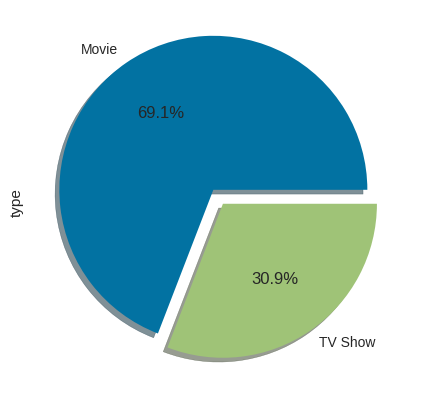

In [ ]:
#The type of content watched on Netflix
data_type=df['type'].value_counts()
#pie plot
data_type.plot(kind='pie',autopct='%1.1f%%', explode = [0.1, 0.01], shadow=True,figsize=(10,5))
plt.show()
#TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%

##### **1. Why did you pick the specific chart?**









Pie charts are the particular chart type utilised in the code. The reason I chose this graphic is that it does a good job of illustrating how category data is distributed. This instance uses a graphic to illustrate the different categories of material that users view on Netflix: "TV Show" and "Movie."

#####**2. What is/are the insight(s) found from the chart?**





Movies make up a lower fraction of 30.9% of the content watched on Netflix, while TV series make up the bulk at 69.1%.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

With a substantially greater percentage of 69.1% for TV series than for films (30.9%), the data clearly reveals that people prefer TV shows over films. This implies that consumers would choose to watch shorter forms of media, like TV series, than devote their time to lengthier, possibly less interesting films.

**Chart 2 - Understanding TV Shows and Movies distribution over the years**

In [ ]:
#Content growth over years
Movie=df[df["type"] == "Movie"]
m=pd.DataFrame(Movie['year_added'].value_counts())
s=m.reset_index()
i=s.rename(columns = {'year_added' : "movie_count", "index" : 'year_added'})
j=i.sort_values('year_added')
j

,year_added,movie_count
13,2008,1
11,2009,2
12,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,58
4,2016,258
3,2017,864


In [ ]:
tvshows=df[df["type"] == "TV Show"]
y=tvshows['year_added'].value_counts()
t=pd.DataFrame(y)
a=t.reset_index()
r=a.rename(columns = {'year_added' : "tv_count", "index" : 'year_added'})
f=r.sort_values('year_added')
f

,year_added,tv_count
9,2008,1
8,2013,5
7,2014,6
5,2015,30
4,2016,185
3,2017,361
2,2018,430
1,2019,656
0,2020,697
6,2021,29


In [ ]:
merged_df = pd.merge(j, f, on='year_added')
merged_df

,year_added,movie_count,tv_count
0,2008,1,1
1,2013,6,5
2,2014,19,6
3,2015,58,30
4,2016,258,185
5,2017,864,361
6,2018,1255,430
7,2019,1497,656
8,2020,1312,697
9,2021,88,29


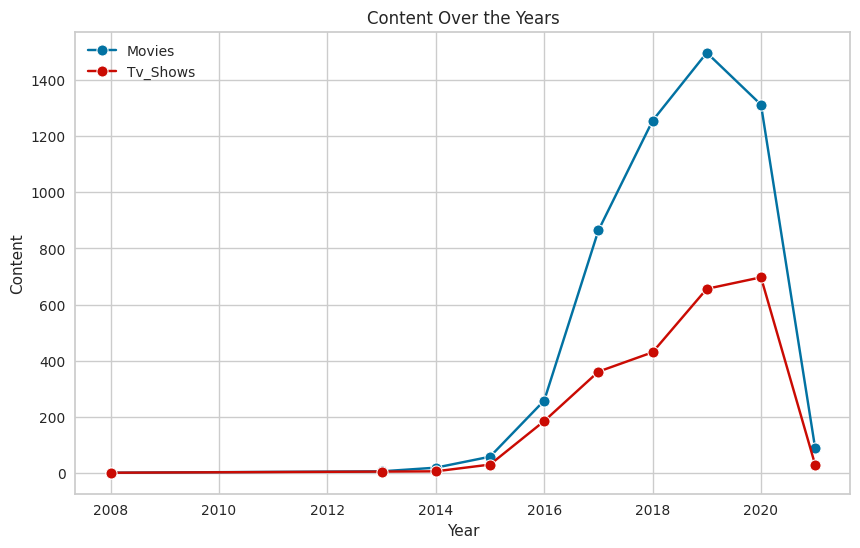

In [ ]:
sns.set_style("whitegrid")  # Optional: Set a grid style for your plot

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Use the `lineplot` function to create the line chart
sns.lineplot(x='year_added', y='movie_count', data=merged_df,label='Movies', marker='o', markersize=8, color='b')
sns.lineplot(x='year_added', y='tv_count', data=merged_df, label='Tv_Shows', marker='o', markersize=8, color='r')
# Optional: Customize the plot title and axis labels
plt.title("Content Over the Years")
plt.xlabel("Year")
plt.ylabel("Content")

# Show the plot
plt.show()

##### **1. Why did you pick the specific chart?**

A line chart is used to display the distribution and trend of data along a continuous axis, in this example the years. It makes comparing the two categories movies and TV showsand how their counts change over time.

##### **2. What is/are the insight(s) found from the chart?**

The trend in the visualisation illustrates that comparatively less TV series and films were uploaded to Netflix between 2008 and 2020. Nonetheless, there was a minor increase in the addition of new content beginning in 2016. The number of new films added reached a notable peak in 2019, with TV shows following as well, although at a slower rate of growth than films.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The acquired insights point to a favourable outcome for Netflix, given the steadily rising demand over time for both TV series and films on the platform. With this expansion, Netflix will have the chance to offer its audience more top-notch content, which will raise user happiness and engagement levels.

**Chart 3 - In which month do most movies and tv shows get added?**

In [ ]:

month_df=pd.DataFrame(df['month_added'].value_counts())
a=month_df.reset_index()
b=a.rename(columns={'index':'month', 'month_added':'count'})
c=b.sort_values("month")
c

,month,count
2,1,757
11,2,472
4,3,669
7,4,601
9,5,543
10,6,542
8,7,600
6,8,618
5,9,619
1,10,785


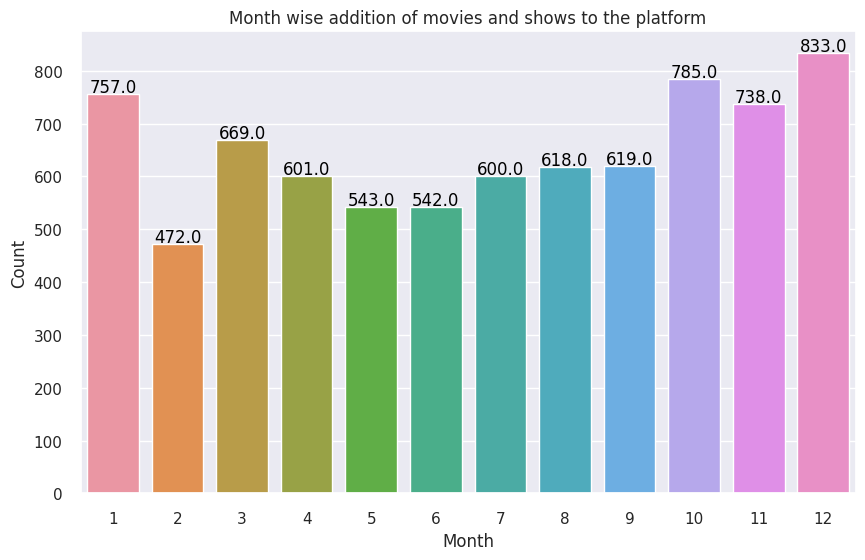

In [ ]:
# Create a bar chart
sns.set(style="darkgrid")  # Optional: Set the plot style

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

ax=sns.barplot(x='month', y='count', data=c)
# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
plt.title("Month wise addition of movies and shows to the platform")
plt.xlabel("Month")
plt.ylabel("Count")

# Show the plot
plt.show()

#####**1. Why did you pick the specific chart?**

When comparing and displaying categorical data (months) and their related counts, a bar chart works well.
The distribution of content additions over several months is shown in the chart, which also makes it easier to spot any patterns or trends.

##### **2. What is/are the insight(s) found from the chart?**

There is a noticeable rise in the quantity of TV series and films that are made available on the Netflix site from October to December. Many individuals spend more time at home and look for entertainment throughout the months of October through December because of the several festivals and celebrations that fall within this time frame. These include Halloween, Diwali, Thanksgiving, and Christmas.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The information gathered about the rise in TV series and films available on Netflix from October to December may have a beneficial effect on company. Here are a few explanations:


**1-Meeting Seasonal Demand**

**2-Retaining Existing Subscribers**

**3-Attracting New Subscribers**

**Chart 4 - What is the frequencies of TV show and movie additions for each month.**

<Axes: xlabel='month_added', ylabel='count'>

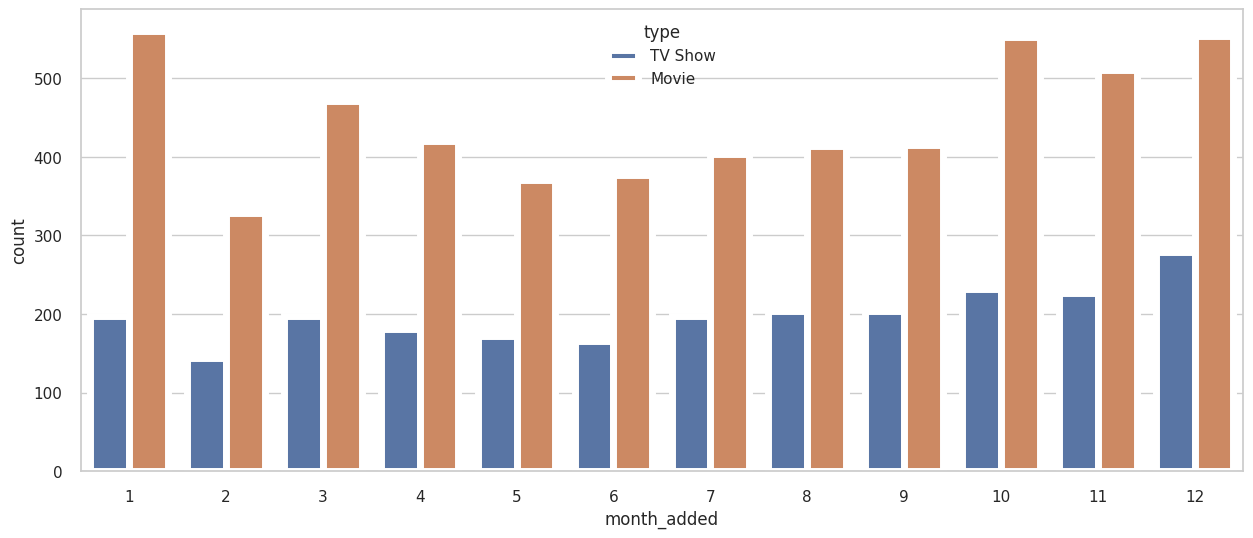

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',lw=5, data=df)

##### **1. Why did you pick the specific chart?**

A countplot makes it simple to view and contrast the number of new TV series and films added each month.

##### **2. What is/are the insight(s) found from the chart?**

* When it comes to new movie additions on Netflix, January, October, and December seem to be the most popular months.

* When compared to other months, October, November, and December stand up as the trending months for new TV show additions on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The information gathered about the months when Netflix films and TV series are trending may have a good effect on company. This is the reason why:

**1-Meeting Viewer Demand:**

**2-Capitalizing on Seasonal Trends:**

**3-Improved Competitiveness:**


**Chart 5 - What is the  percentage of Netflix Originals and Non-Originals**

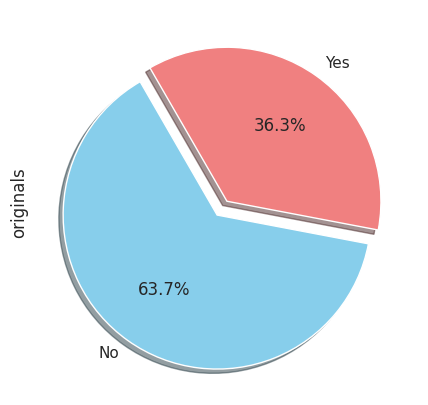

In [ ]:
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
# Netflix originals
data_type=df['originals'].value_counts()
#pie plot
custom_colors = ['skyblue', 'lightcoral']
data_type.plot(kind='pie',autopct='%1.1f%%', explode = [0.1, 0.01], shadow=True,figsize=(10,5), colors=custom_colors, startangle=120)
plt.show()

#Out of the movies available on Netflix, 36.3% are Netflix originals, while the remaining 63.7% are movies that were released earlier through different distribution channels and subsequently added to the Netflix

##### **1. Why did you pick the specific chart?**

The distribution of categorical data, such as the percentage of "originals" and "others" in this instance, can be visually represented using a pie plot. It enables you to view each category's relative sizes as a percentage of the total.

##### **2. What is/are the insight(s) found from the chart?**

36.3% of the films on Netflix are Netflix original productions, and the other 63.7% were previously published through other distribution outlets before being added to the Netflix collection.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, acquiring insights can really contribute to a successful business outcome. The streaming service can decide on content creation and acquisition by having a thorough grasp of how films are distributed on the platform, including the ratio of Netflix originals to non-originals.

**Chart 6 - Which contries are the top 10 most content provider?**

In [ ]:
Country=pd.DataFrame(df["country"].value_counts())

b=Country.reset_index()
r=b.rename(columns = {'country' : "count", "index" : 'country'})
a=r.head(10)
a

,country,count
0,United States,3055
1,India,923
2,United Kingdom,396
3,Japan,225
4,South Korea,183
5,Canada,177
6,Spain,134
7,France,115
8,Egypt,101
9,Turkey,100


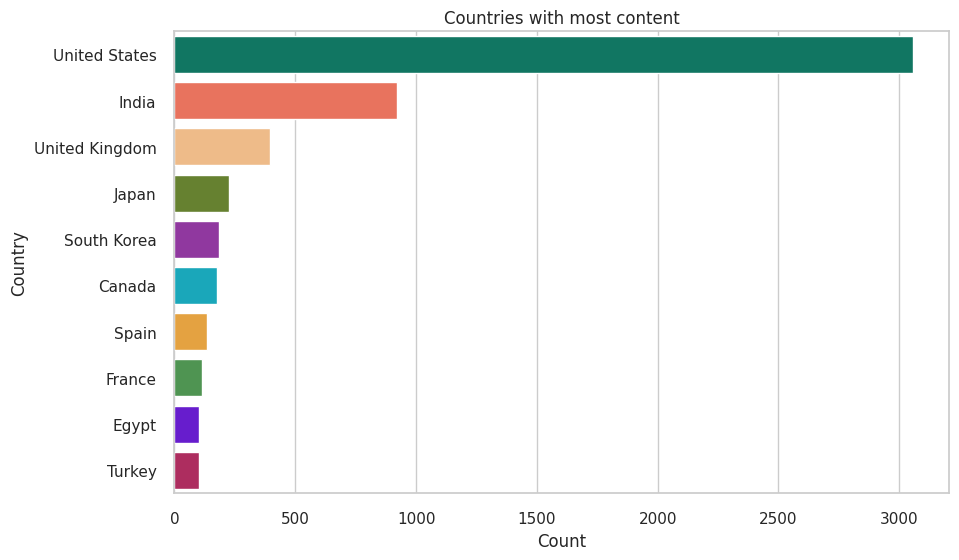

In [ ]:
custom_colors = ['#00876c', '#ff6347', '#ffbb78', '#6b8e23', '#9c27b0', '#00bcd4', '#ffa726', '#43a047', '#6200ea', '#c2185b']


# Set Seaborn style and create the bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use sns.barplot to create a horizontal bar chart
ax=sns.barplot(x='count', y='country', data=a, palette=custom_colors)

# Customize the plot
plt.title("Countries with most content")
plt.xlabel("Count")
plt.ylabel("Country")

# Show the plot
plt.show()

#####**1. Why did you pick the specific chart?**

The distribution of categorical data in this instance, can be visually represented using a Bar chart It enables you to view the content distribution in the top 10 countries

##### **2. What is/are the insight(s) found from the chart?**

From the above Bar chart we found that "United States" has the most content that is over 3000.

Followed by "India"which has nearly 1000 Content and is second in the list of most content producers.



#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, from above insight we got to know:
* The United States is a leading producer this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the amount of content available on the Netflix.

**Chart 7 -Understanding TV and Movie count by Country**

In [ ]:
tvshows=df[df["type"] == "TV Show"]
a=tvshows["country"].value_counts()

t=pd.DataFrame(a)
z=t.reset_index()

r=z.rename(columns = {'country' : "tv_count", "index" : 'country'})
e=r.head(10)
e

,country,tv_count
0,United States,975
1,United Kingdom,203
2,Japan,156
3,South Korea,147
4,India,71
5,Taiwan,68
6,Canada,59
7,France,46
8,Spain,45
9,Australia,45


In [ ]:
movies=df[df["type"] == "Movie"]
c=movies["country"].value_counts()

o=pd.DataFrame(c)
l=o.reset_index()

k=l.rename(columns = {'country' : "movie_count", "index" : 'country'})
p=k.head(10)
p

,country,movie_count
0,United States,2080
1,India,852
2,United Kingdom,193
3,Canada,118
4,Spain,89
5,Egypt,89
6,Turkey,73
7,Philippines,70
8,France,69
9,Japan,69


In [ ]:
merge_df = pd.merge(e, p, on='country')
merge_df

,country,tv_count,movie_count
0,United States,975,2080
1,United Kingdom,203,193
2,Japan,156,69
3,India,71,852
4,Canada,59,118
5,France,46,69
6,Spain,45,89


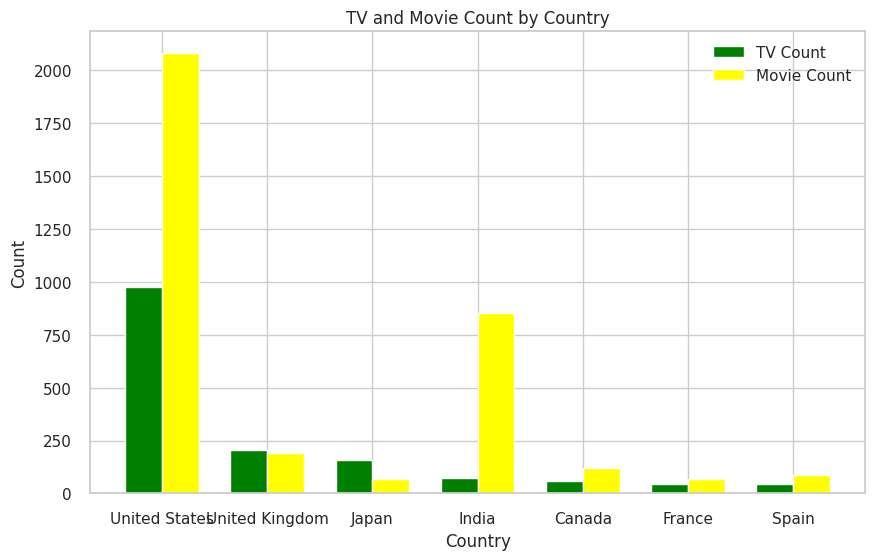

In [ ]:
# Set Seaborn style and create the grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Define the bar width
bar_width = 0.35
index = np.arange(len(merge_df))

# Create the 'TV Count' bars
plt.bar(index, merge_df['tv_count'], bar_width, label='TV Count', color='green')

# Create the 'Movie Count' bars next to the 'TV Count' bars
plt.bar(index + bar_width, merge_df['movie_count'], bar_width, label='Movie Count', color='yellow')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('TV and Movie Count by Country')
plt.xticks(index + bar_width / 2, merge_df['country'])
plt.legend()

# Show the plot
plt.show()







#####**1. Why did you pick the specific chart?**

The distribution of categorical data in this instance, can be visually represented using a Bar chart It enables you to view the content distribution in the top 10 countries

This chart helps to understand the distribution of TV shows and Movies across different countries

##### **2. What is/are the insight(s) found from the chart?**

From the above Bar chart we found that "United States" has the most content in both TV shows and Movies

Except UK and Japan rest in every country the number of movies realised are more than number of TV shows realised.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

By looking clearly into the graph we can understand the distribution of TV shows and Movies across different countries, Which will helps us to take an informative decision while realising different types of contents across different locations.

**Chart 8 - What are the diffrent types of ratings?**

In [ ]:
# RATINGS
#counting all type ratings
c=df.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})
c

,Rating,Count
0,TV-MA,2868
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


Text(0.5, 1.0, 'Movies/TV shows - Rating wise')

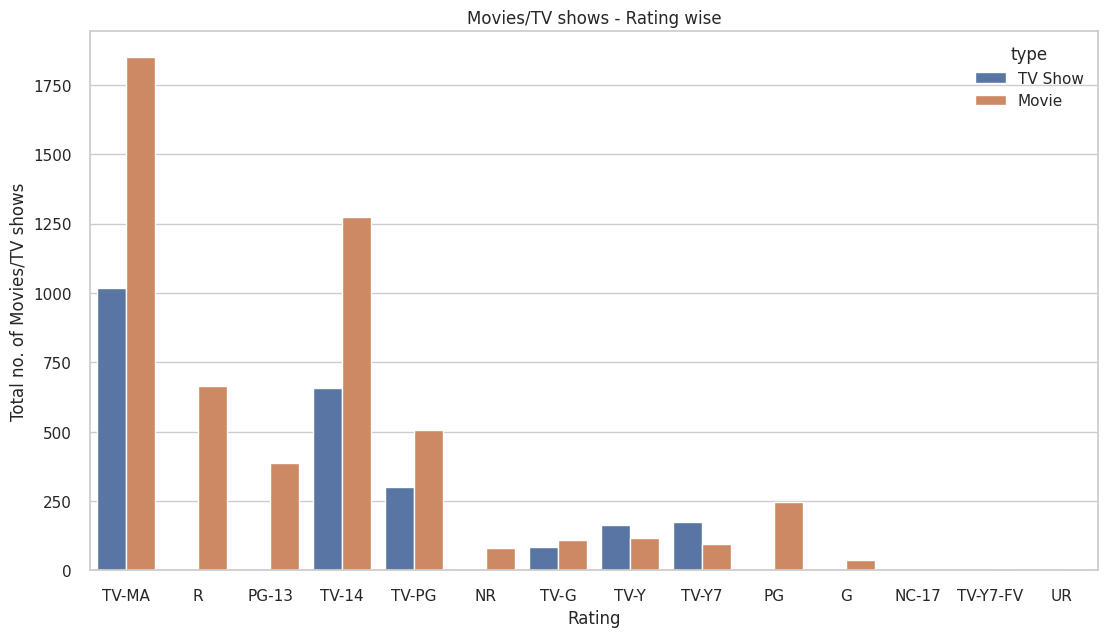

In [ ]:
#Plotting a countplot to get in depth analysis from ratings
plt.figure(figsize=(13,7))
sns.countplot(x='rating',hue='type',data=df)
plt.xlabel('Rating')
plt.ylabel('Total no. of Movies/TV shows')
plt.title("Movies/TV shows - Rating wise")

#####**1. Why did you pick the specific chart?**

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### **2. What is/are the insight(s) found from the chart?**

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17, TV-Y7-FV, UR.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

***Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.***


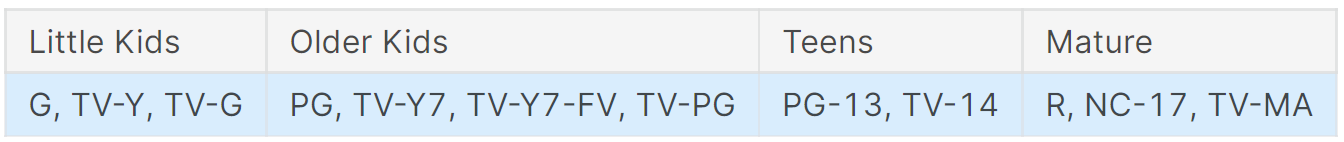



Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

**Chart 9 - Understanding overall ratings distribution**

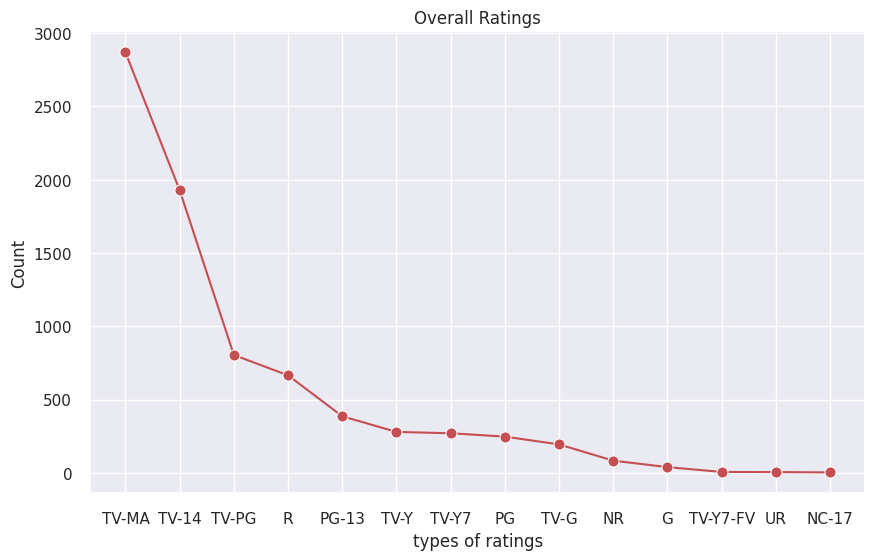

In [ ]:
sns.set_style("darkgrid")  # Optional: Set a grid style for your plot

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Use the `lineplot` function to create the line chart
sns.lineplot(x='Rating', y='Count', data=c, marker='o', markersize=8, color='r')

# Optional: Customize the plot title and axis labels
plt.title("Overall Ratings")
plt.xlabel("types of ratings")
plt.ylabel("Count")

# Show the plot
plt.show()

**Chart 10 - What are the Top 10 genre of Movies ?**

In [ ]:
#Analysing top10 genre of the movies
movies=df[df["type"] == "Movie"]
d=movies["listed_in"].value_counts()
v=pd.DataFrame(d)
l=v.reset_index()

y=l.rename(columns = {'listed_in' : "count", "index" : 'genre'})
z=y.head(10)
z

,genre,count
0,Documentaries,334
1,Stand-Up Comedy,321
2,"Dramas, International Movies",320
3,"Comedies, Dramas, International Movies",243
4,"Dramas, Independent Movies, International Movies",215
5,Children & Family Movies,177
6,"Documentaries, International Movies",172
7,"Children & Family Movies, Comedies",169
8,"Comedies, International Movies",161
9,"Dramas, International Movies, Romantic Movies",153


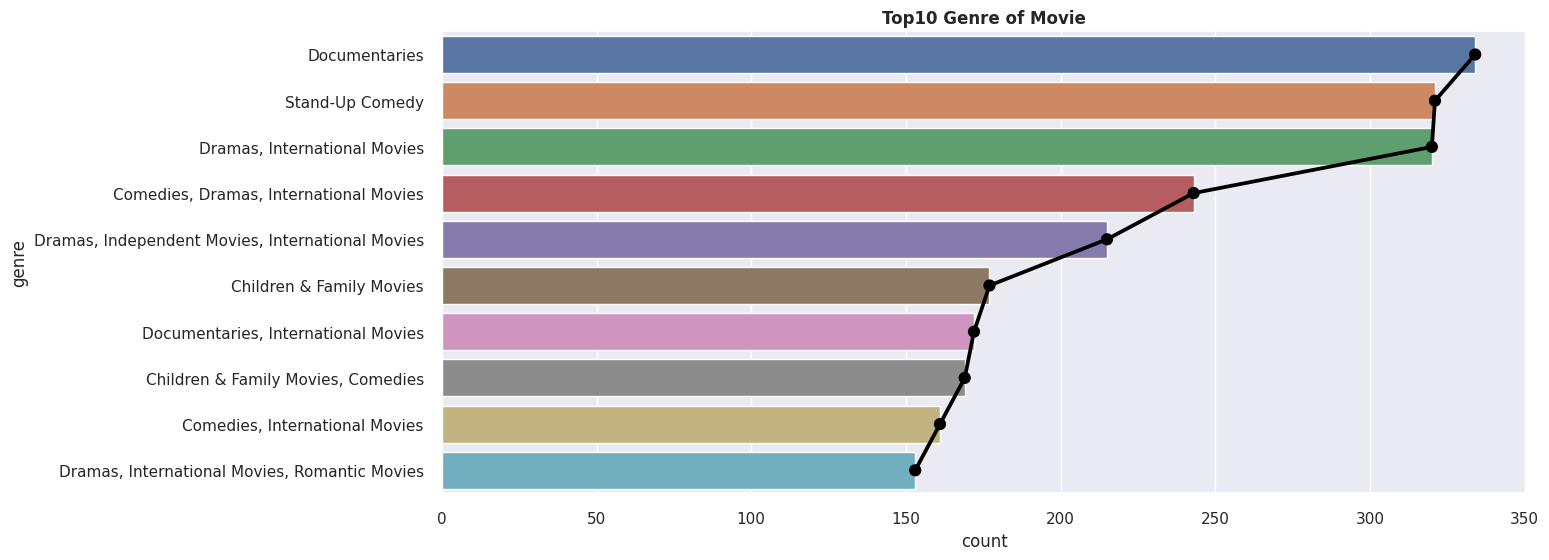

In [ ]:
plt.figure(figsize=(14,6))
# plt.xticks(rotation=45)
# Create a bar plot
sns.barplot(x="count", y="genre", data=z)

# Create a line plot on top of the bar plot
sns.pointplot(x="count", y="genre", data=z, color="black")
plt.title('Top10 Genre of Movie', fontweight="bold")
# Show the plot
plt.show()

##### **1. Why did you pick the specific chart?**

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space. Plus adding a line chart on top of it helps us to understand the trends better.

##### **2. What is/are the insight(s) found from the chart?**

In this chart, the top three genres of Movies based on their distribution are:

1-**Documentaries**

2-**Stand-up Comedy**

3-**Drama, International Movies**

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**



The gained insights from analyzing the distribution of genres of Movie can potentially help create a positive business impact in several ways

1-**Content Curation :** By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies to its subscribers

2-**Targeted Acquisitions and Productions :** It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-**Personalized Recommendations:** Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.



**Chart 11 - What are the Top 10 genre of TV Shows ?**

In [ ]:
#Analysing top10 genre of the tv shows
tv_shows=df[df["type"] == "TV Show"]
di=tv_shows["listed_in"].value_counts()
vi=pd.DataFrame(di)
li=vi.reset_index()

yi=li.rename(columns = {'listed_in' : "count", "index" : 'genre'})
zi=yi.head(10)
zi

,genre,count
0,Kids' TV,204
1,"International TV Shows, TV Dramas",111
2,"Crime TV Shows, International TV Shows, TV Dramas",106
3,"Kids' TV, TV Comedies",89
4,"International TV Shows, Romantic TV Shows, TV ...",86
5,Reality TV,83
6,"International TV Shows, Romantic TV Shows, TV ...",79
7,"Anime Series, International TV Shows",75
8,Docuseries,73
9,"International TV Shows, Korean TV Shows, Roman...",65


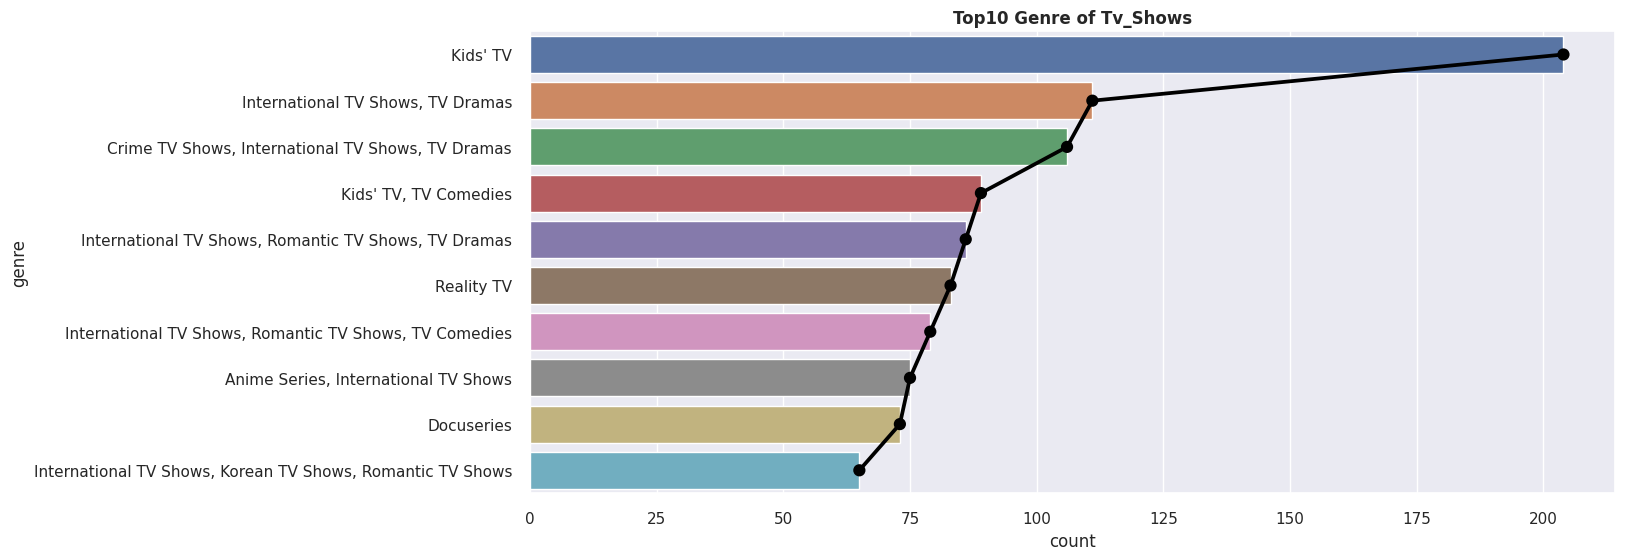

In [ ]:
plt.figure(figsize=(14,6))
# plt.xticks(rotation=45)
# Create a bar plot
sns.barplot(x="count", y="genre", data=zi)

# Create a line plot on top of the bar plot
sns.pointplot(x="count", y="genre", data=zi, color="black")
plt.title('Top10 Genre of Tv_Shows', fontweight="bold")
# Show the plot
plt.show()

1.**Why did you pick the specific chart?**

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space. Plus adding a line chart on top of it helps us to understand the trends better.

##### **2. What is/are the insight(s) found from the chart?**

In this chart, the top three genres on Tv_shows based on their distribution are:

1.Kids'TV

2.International TV Shows, TV Dramas

3.Crime TV Shows, International TV Shows, TV Dramas

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**



The gained insights from analyzing the distribution of genres of TV Shows can potentially help create a positive business impact in several ways

1-**Content Curation :** By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of Shows to its subscribers

2-**Targeted Acquisitions and Productions :** It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-**Personalized Recommendations:** Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.



**Chart 12 - Who are the Top 10 most contributors on Netflix?**

In [ ]:
# Top 10 directors with the most contributions on Netflix
ac=pd.DataFrame(df['director'].value_counts())
b=ac[1:11]
xi=b.reset_index()

op=xi.rename(columns = {'director' : "count", "index" : 'director'})
op

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Lance Bangs,8


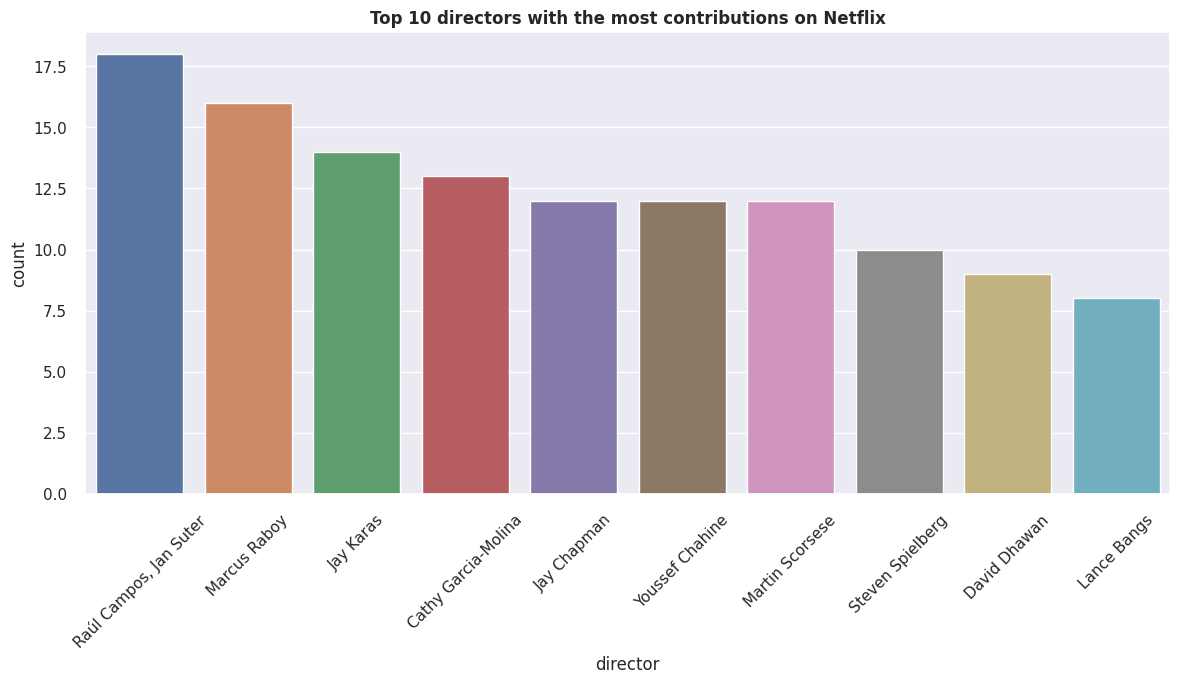

In [ ]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
sns.barplot(x="director", y="count", data=op)
plt.title("Top 10 directors with the most contributions on Netflix",fontweight="bold")
plt.show()

##### **1. Why did you pick the specific chart?**

 The chosen chart effectively presents the data in an intuitive and visually appealing manner, allowing viewers to easily identify the directors with the most contributions on Netflix.

##### **2. What is/are the insight(s) found from the chart?**

The directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

From the above insight we got to know:
* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

**Chart 13 - WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title**

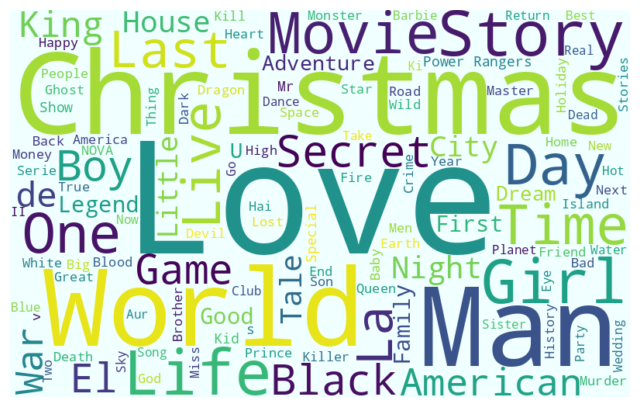

In [ ]:
# Most frequently used words in Title
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(width = 800, height = 500,stopwords=STOPWORDS, background_color='azure', min_font_size=15).generate(text)

# plot the word cloud

plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### **1. Why did you pick the specific chart?**

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

#####**2. What is/are the insight(s) found from the chart?**

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

From the above insight we got to know:
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

**Chart 14 - Heatmap to understand the correlation**

In [ ]:
# Preparing data for heatmap to understand the correlation
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age']=df['rating'].replace(ratings)

In [ ]:
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_age'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_age,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.77,0.469945,0.835821,0.512626,0.472668
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093434,0.089362
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204545,0.195090
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.14,0.382514,0.097015,0.189394,0.242881


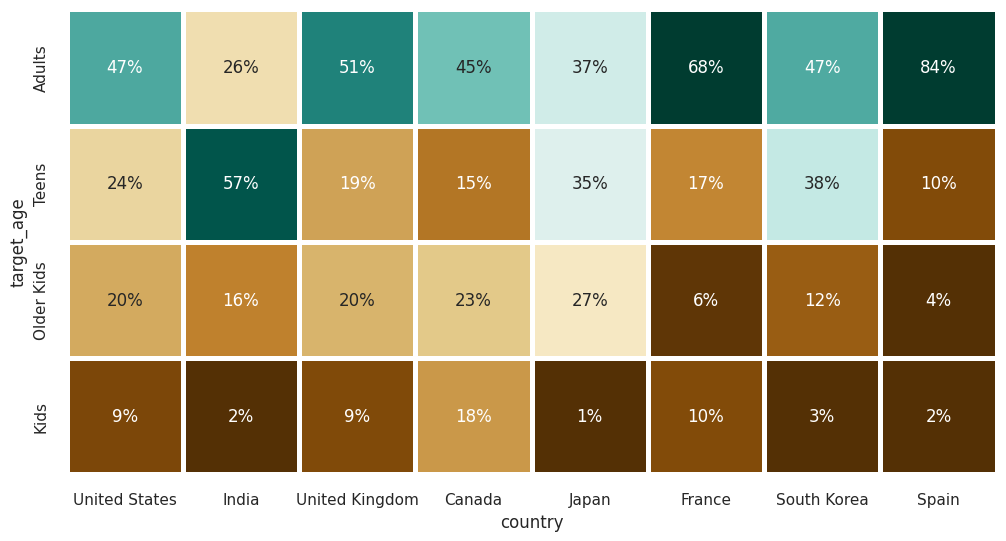

In [ ]:
#Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="BrBG",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()


**1. Why did you pick the specific chart?**


A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### **2. What is/are the insight(s) found from the chart?**


In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.

4.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

5.**Japan**- It shows a moderate level of interest among both adults and teens, with 37% of each group expressing interest.

6.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France & India have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**.

3.**Will the gained insights help creating a positive business impact?**


The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

# **5.Making Some Hypothesis test:-**

**1.Hypothesis Testing**

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,originals,target_age,count
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Yes,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Yes,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,No,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,No,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,No,Teens,1


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,originals,target_age,count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Yes,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,No,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,No,Teens,1


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_age']].groupby(by='target_age')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_age,duration
0,Adults,98.230769
1,Kids,66.486891
2,Older Kids,92.024648
3,Teens,110.025332


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

After calculating the t-statistic, you compare it to critical values from a t-distribution

**Because the t-value is not in the range, the null hypothesis is rejected.**

**As a result, movies rated for kids and older kids are not at least two hours long.**

 Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. And the main reason to use t-test is that here the standard deviation is unknown

**2.Hypothesis Testing**

HO:There is no significant difference in number of 'movies' and 'TV shows' available on Netflix

H1:There is a significant difference in number of 'movies' and 'TV shows' available on Netflix

In [ ]:
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 47.74059011958195
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

**Why did you choose the specific statistical test?**

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

# **6.Textual Data Preprocessing:-**

In [ ]:
#Importing Libraries

In [ ]:
import nltk
nltk.download('wordnet')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
df['tags'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [ ]:
# Cross checking our result for the function created
print(df['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


**Lower casing the words**

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(to_lower)

# Cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


**Removing Punctuations**

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


**Removing Stopwords**

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(df['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


**Removing the white spaces**

In [ ]:
# Remove White spaces in 'tags' column
df['tags'] = df['tags'].str.strip()

# Cross-check our result for the function created
print(df['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


**Tokenization**

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(df['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = df['tags']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


**Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create an object of the lemmatization function
lemmatizer = WordNetLemmatizer()

# Define a function to normalize text using lemmatization
def lemmatize_text(text):
    '''A function which lemmatizes each word in the given text'''

    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(lemmatized_words)

# Assuming you have a DataFrame called 'df' and a column 'tags' that you want to lemmatize
df['tags'] = df['tags'].apply(lemmatize_text)
print(df['tags'][0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


future elite inhabit island paradise far crowded slum get one chance join saved squalor tvma brazil international tv show tv drama tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Here we used lemmatization.

A linguistic and natural language processing (NLP) technique called lemmatization entails breaking down words into their most basic or root form. A lemma refers to a word's basis or root form. Lemmatization is the process of combining various word forms into a single group so that they can be examined as a single, common root.

The lemma for "running" in English, for instance, would be "run," whereas the lemma for "better" would be "good." Lemmatization is helpful in NLP applications such as text analysis and information retrieval when it's critical to comprehend a word's fundamental meaning independent of its grammatical structure.

Lemmatization is frequently compared to stemming, another method of text normalisation. Lemmatization takes a more sophisticated method, taking into account the context and meaning of words in a language, in contrast to stemming, which consists of eliminating suffixes from words to produce a common base form. Therefore, when compared to simple stemming, lemmatization typically yields more accurate and linguistically relevant outcomes.




**Vectorization**

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(df['tags'])

# # Collect the vocabulary items used in the vectorizer
# dictionary = tfidf.vocabulary_.items()
# t_vectorizer = TfidfVectorizer(max_features=20000)
# X= t_vectorizer.fit_transform(df['tags'])

TfidfVectorizer(lowercase=False, max_features=9000, stop_words='english')

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [ ]:
vec_data=pd.DataFrame(vector)
vec_data

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.148849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

We have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

We have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. we then removed the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

###  Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

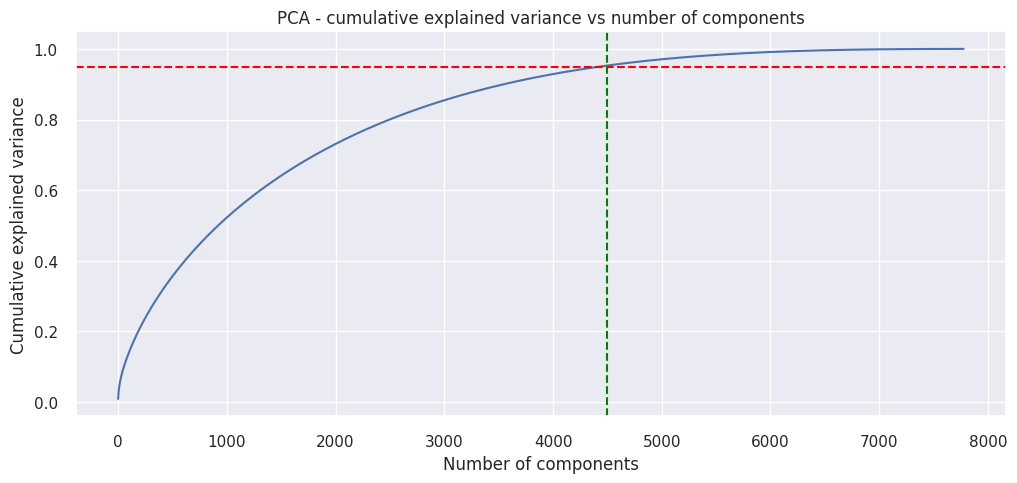

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.95, color='red', linestyle='--')
plt.axvline(x= 4500, color='green', linestyle='--')

# Display chart
plt.show()

We found that around 7500 components account for 100% of the variance.Also, just 4500 components comprise more than 90% of the variation. Hence using 4500 components for the analysis.

In [ ]:
# Reducing the dimensions to 4500 using pca
pca = PCA(n_components=4500, random_state=32)
pca.fit(vector)

PCA(n_components=4500, random_state=32)

In [ ]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

## ***7. ML Model Implementation***

**ML Model - 1 : K-Means Clustering**

In [ ]:
# ML Model - 1 : K-Means Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19), k=(2, 20),
                 locate_elbow=False, timings=False)

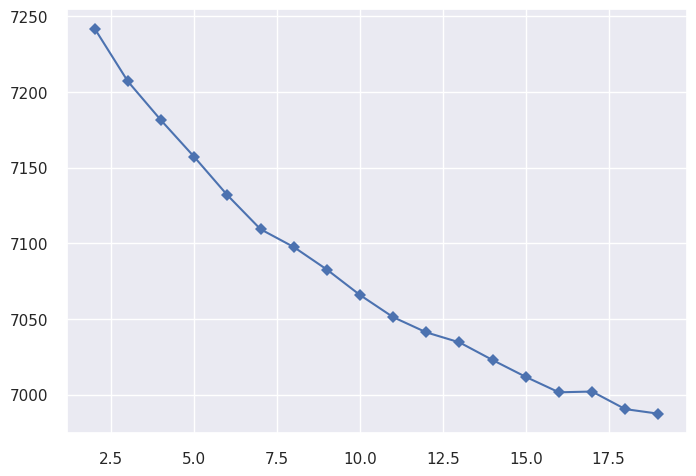

In [ ]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

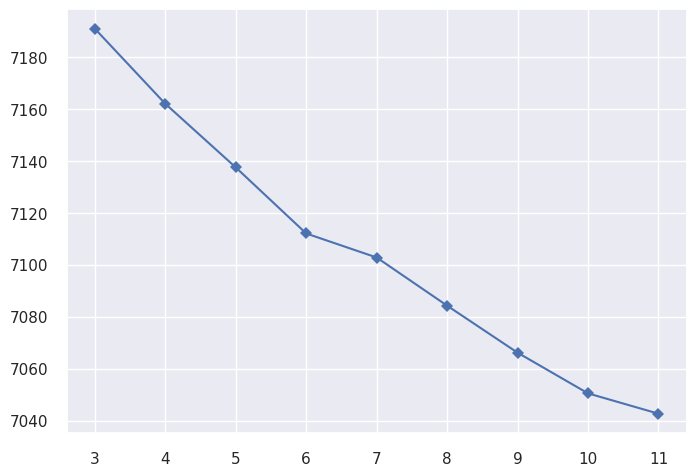

In [ ]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
df["K_mean_cluster"]=y_kmean
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,originals,target_age,count,tags,K_mean_cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Yes,Adults,1,future elite inhabit island paradise far crowd...,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Yes,Adults,1,devastating earthquake hit mexico city trapped...,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,No,Adults,1,army recruit found dead fellow soldier forced ...,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,No,Teens,1,postapocalyptic world ragdoll robot hide fear ...,2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,No,Teens,1,brilliant group student become cardcounting ex...,2


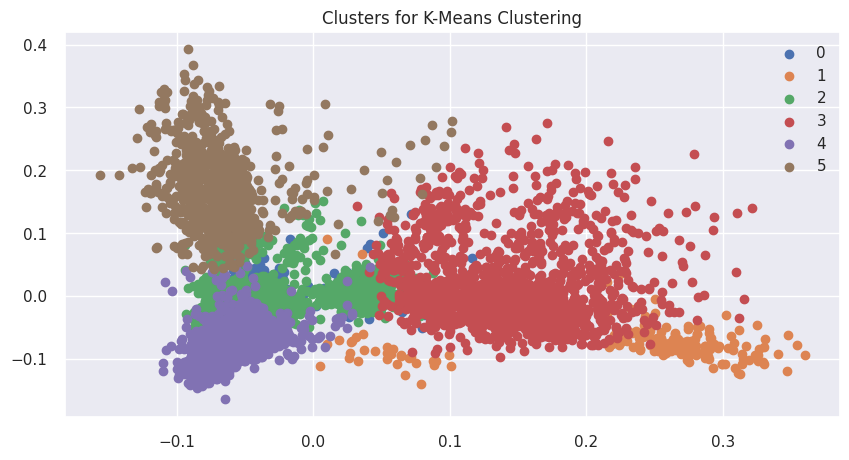

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.


K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

   You could pick K random data points and make those your starting points.

   Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

   Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

  The algorithm is said to have “converged” once there are no more changes.



These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning



##### Which hyperparameter optimization technique have you used and why?

Here we have used Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square).   i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

In [ ]:
# ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

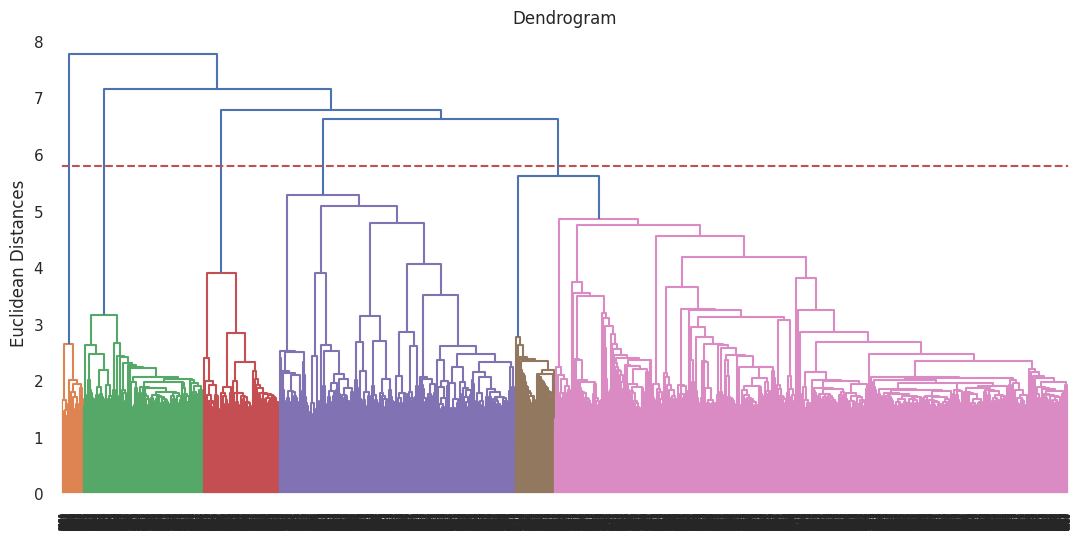

In [ ]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 5.

In [ ]:
# Instantiate the Agglomerative clustering model where number of clusters is 5
aggh = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [ ]:
# Adding a new column 'Agg_cluster' in the dataset
df["Agg_cluster"]=y_hc
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,day_added,month_added,year_added,originals,target_age,count,tags,K_mean_cluster,Agg_cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,14,8,2020,Yes,Adults,1,future elite inhabit island paradise far crowd...,3,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,After a devastating earthquake hits Mexico Cit...,23,12,2016,Yes,Adults,1,devastating earthquake hit mexico city trapped...,4,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,"When an army recruit is found dead, his fellow...",20,12,2018,No,Adults,1,army recruit found dead fellow soldier forced ...,4,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,No,Teens,1,postapocalyptic world ragdoll robot hide fear ...,2,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,A brilliant group of students become card-coun...,1,1,2020,No,Teens,1,brilliant group student become cardcounting ex...,2,0


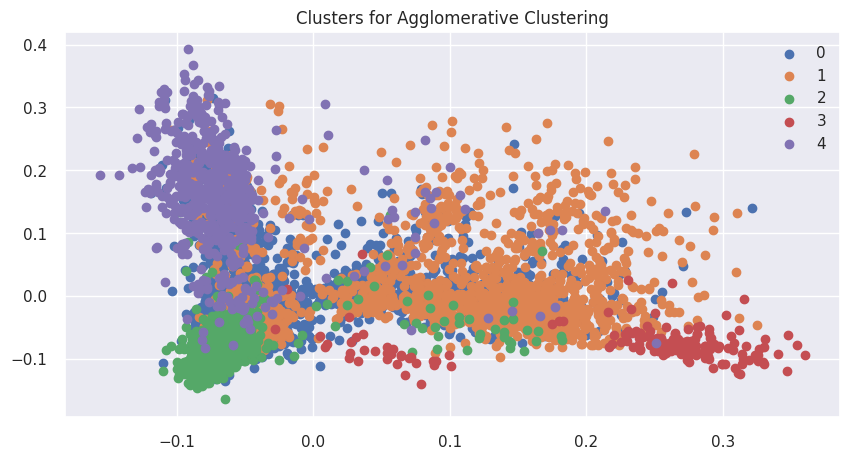

In [ ]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

We have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 5.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3 : Silhouette Score for Clustering

In [ ]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,10):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0059
For n_clusters = 3, silhouette score is 0.0074
For n_clusters = 4, silhouette score is 0.0090
For n_clusters = 5, silhouette score is 0.0097
For n_clusters = 6, silhouette score is 0.0070
For n_clusters = 7, silhouette score is 0.0083
For n_clusters = 8, silhouette score is 0.0081
For n_clusters = 9, silhouette score is 0.0087


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

For n_clusters = 2, silhouette score is 0.005912197875788228


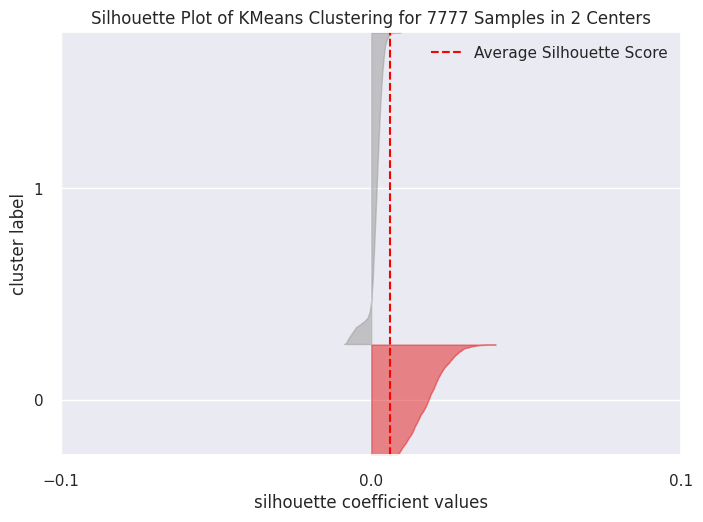

For n_clusters = 3, silhouette score is 0.007442518169516576


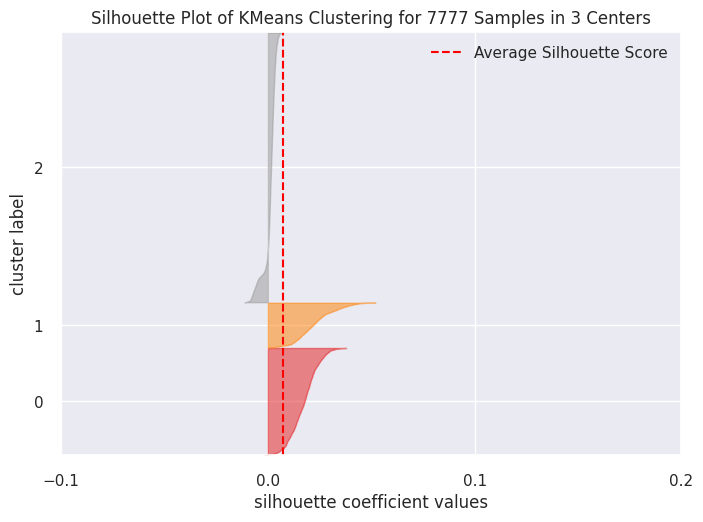

For n_clusters = 4, silhouette score is 0.008991033678774756


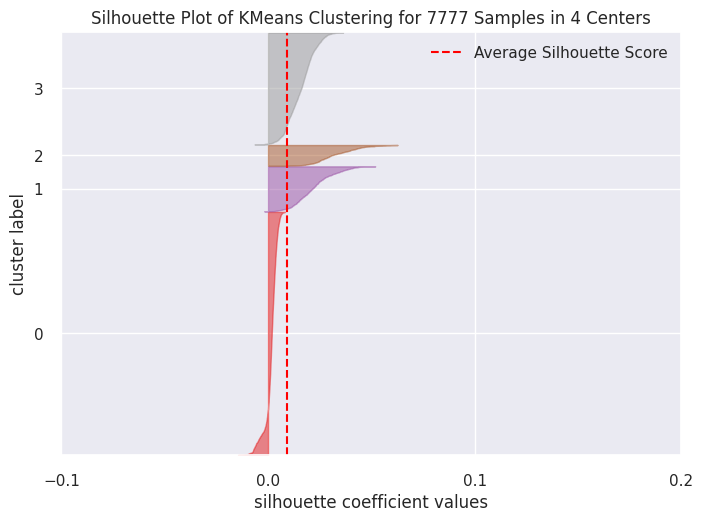

For n_clusters = 5, silhouette score is 0.00971002537550706


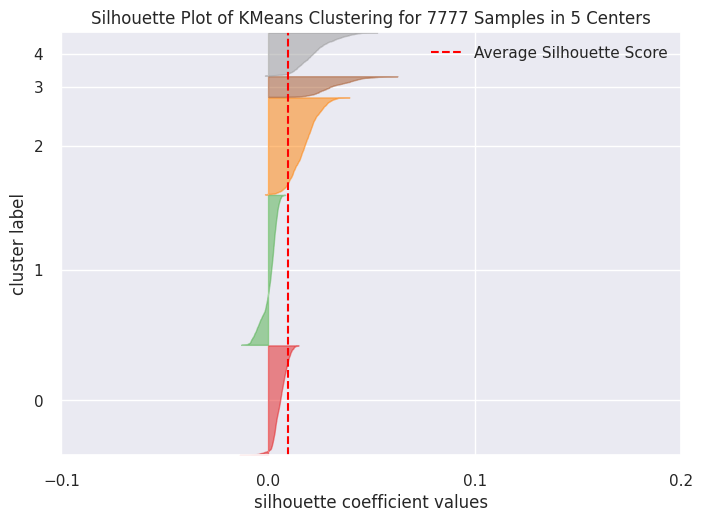

For n_clusters = 6, silhouette score is 0.006969662451270578


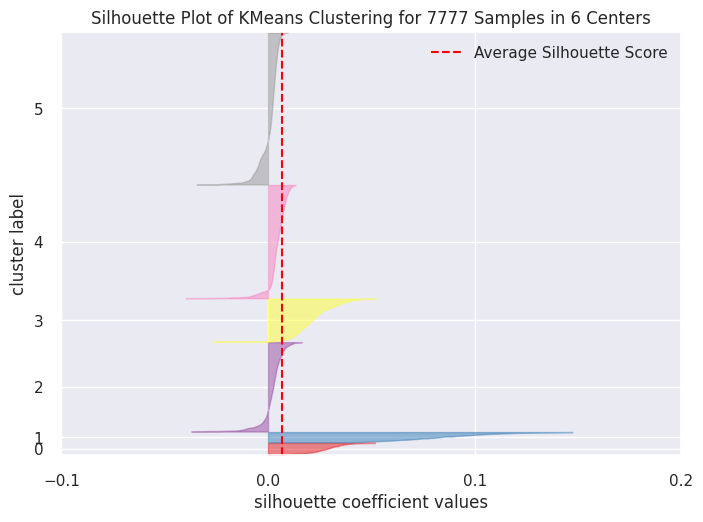

For n_clusters = 7, silhouette score is 0.008274912171211074


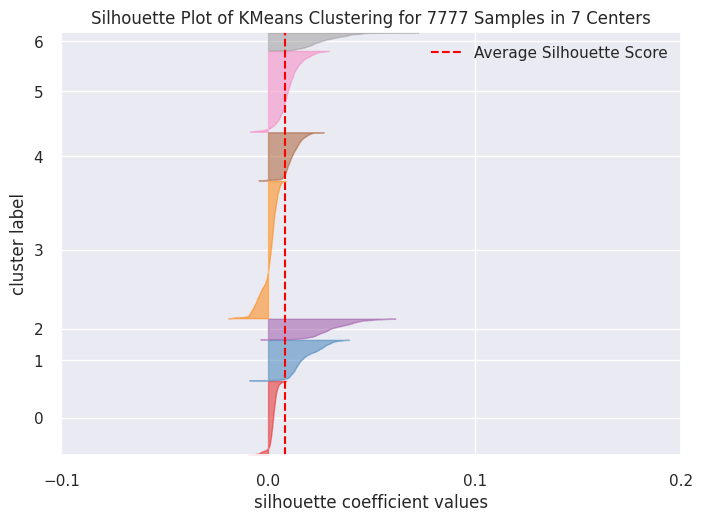

For n_clusters = 8, silhouette score is 0.008070220276812357


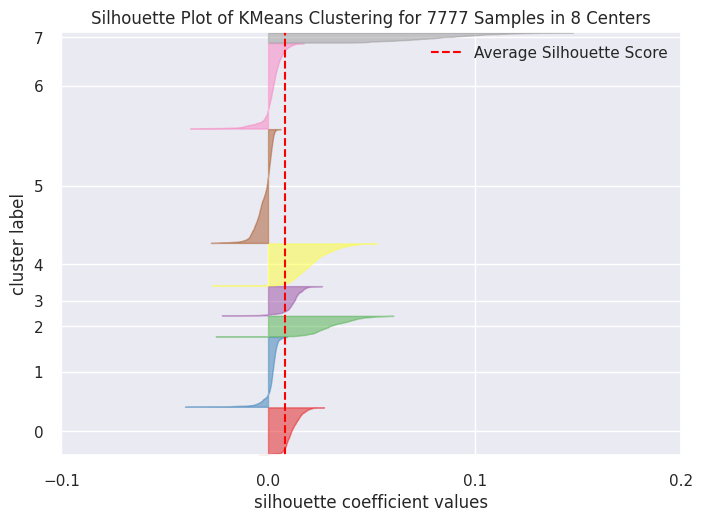

For n_clusters = 9, silhouette score is 0.008730151295560803


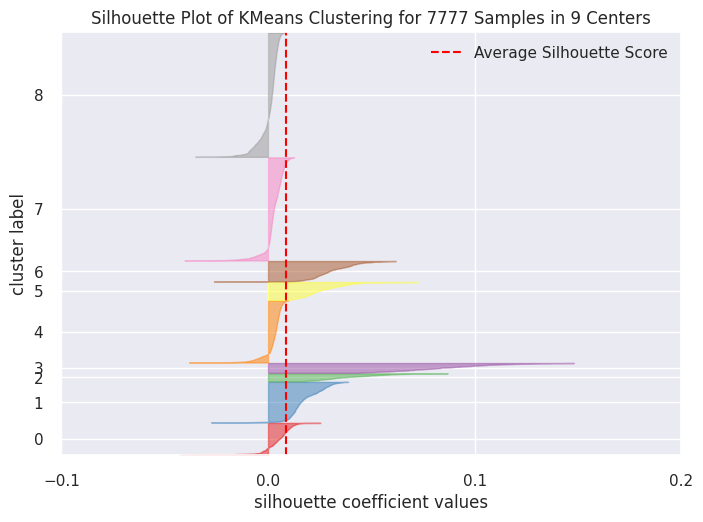

In [ ]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,10):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

**By looking into the Silhouette score and plots we can clearly say that ML model having 5 clusters is the most suitable and optimal choice**

# **Again Building a K-means clustering model with number of clusters=5**

We have decided to build a new K-means model where number of clusters will be 5 and compare it with the K-means model where cluster number was 6 and will also compare it with aglomerative clustering model where the cluster number was 5

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 5
kmean=KMeans(n_clusters=5)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
df["K_mean_cluster"]=y_kmean
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,day_added,month_added,year_added,originals,target_age,count,tags,K_mean_cluster,Agg_cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,14,8,2020,Yes,Adults,1,future elite inhabit island paradise far crowd...,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,After a devastating earthquake hits Mexico Cit...,23,12,2016,Yes,Adults,1,devastating earthquake hit mexico city trapped...,3,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,"When an army recruit is found dead, his fellow...",20,12,2018,No,Adults,1,army recruit found dead fellow soldier forced ...,3,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,No,Teens,1,postapocalyptic world ragdoll robot hide fear ...,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,A brilliant group of students become card-coun...,1,1,2020,No,Teens,1,brilliant group student become cardcounting ex...,1,0


In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

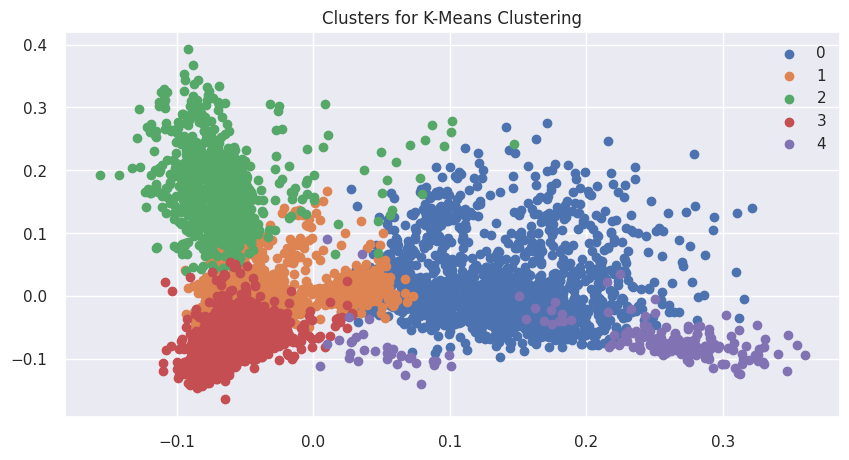

In [ ]:
# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

**1. Which Evaluation metrics did you consider for a positive business impact and why?**

It is very important to evaluate the ML model with all the evaluation metrics and then decide the number of clusters, So in my analysis all the evaluation metrics that are Silhouette score, Dendogram and Elbow curve had played a very significant role and all of them have there own importance.

**2. Which ML model did you choose from the above created models as your final prediction model and why?**

From the charts we can see that K-Mean Clustering model where number of clusters are 5 is best model for our data.

Here we get optimal number of clusters is 5, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

# **Understanding what each cluster upholds:-**

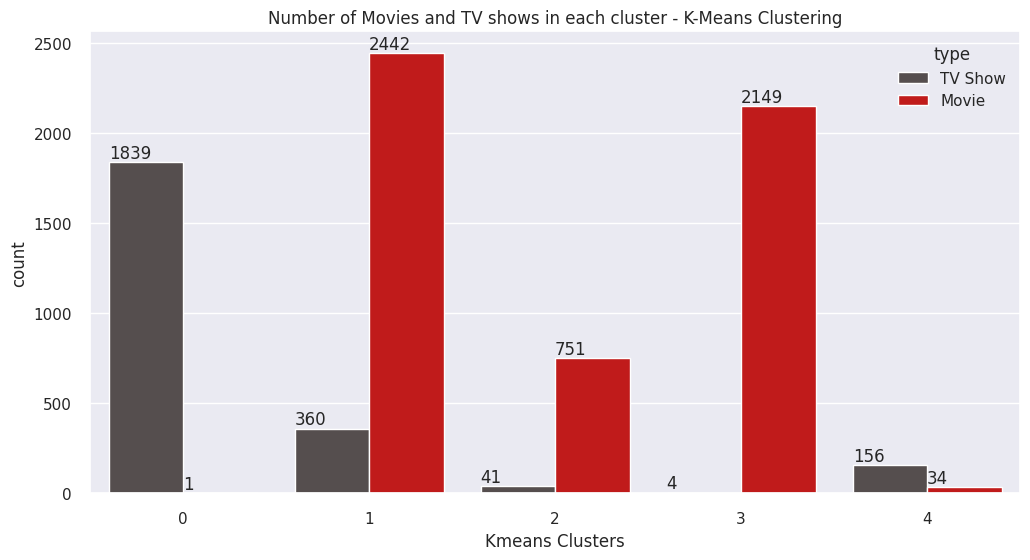

In [ ]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=df, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

In [ ]:
# Let's do Cluster Analysis....................

# Clustering similar content by matching text-based features

In [ ]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in df[df['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

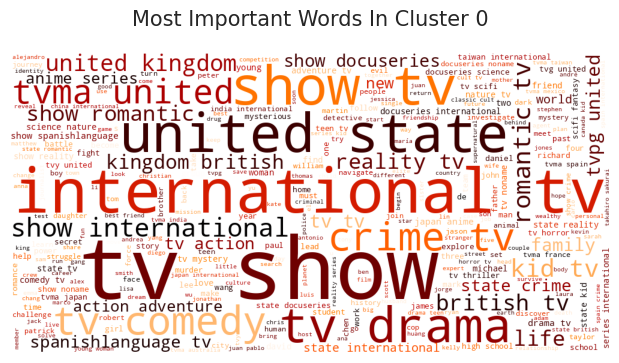

In [ ]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, international tv, tv show etc.**

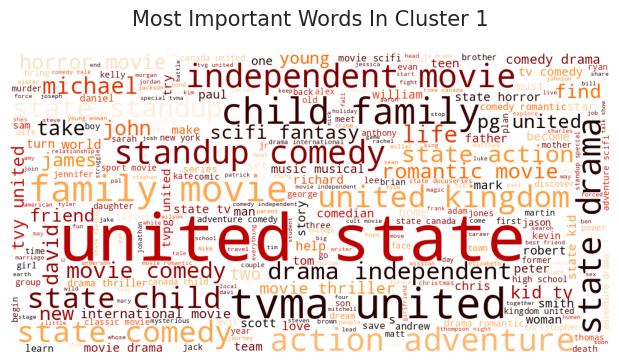

In [ ]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: independent movie, child family, united state etc.**

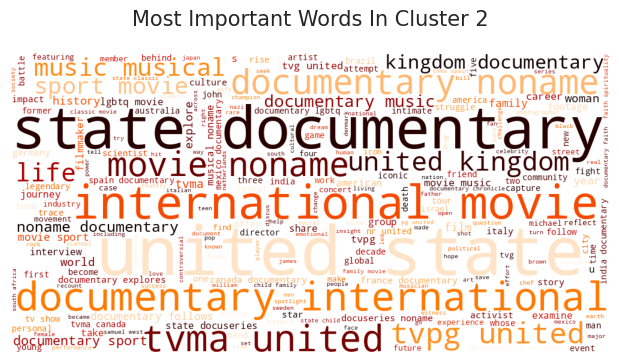

In [ ]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: state documentry, international movie, documentary international etc.**

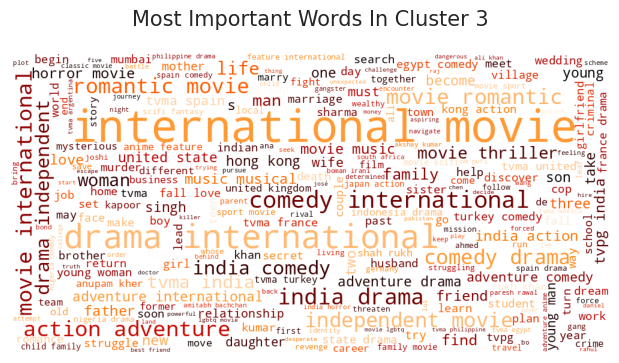

In [ ]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: , international movie, comedy international, drama international etc.**

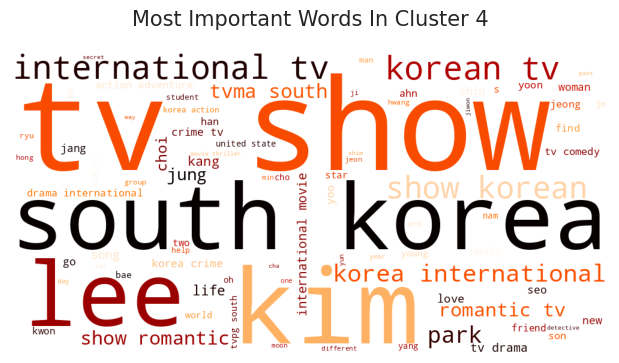

In [ ]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: tv show, south korea, kim etc.**

# **Conclusion :--**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, and we have successfully achieved our goal.

Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 90% of the variance by reducing the components to 4500.

Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

In Agglomerative clustering the optimal number of clusters was also 5, which we visualized with a dendrogram.

And finally we got our best clustering model that was K-means where the most appropriate number of cluster is 5.

# **THANK YOU!!!**